## import library yang digunakan

In [13]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os


## load dataset

In [ ]:
path = kagglehub.dataset_download("prepinstaprime/europe-bike-store-sales")

data = pd.read_csv(os.path.join(path, 'Sales.csv'))
df = pd.DataFrame(data.values)
df.columns = data.columns
df


NameError: name 'kagglehub' is not defined

## checking datatipe pada kolom

In [ ]:
print(df.dtypes)


Date                object
Day                 object
Month               object
Year                object
Customer_Age        object
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity      object
Unit_Cost           object
Unit_Price          object
Profit              object
Cost                object
Revenue             object
dtype: object


## formatting data

In [ ]:
# Pastikan kolom numerik bertipe numerik (int/float)
numeric_cols = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows dengan missing value pada kolom yang akan digunakan untuk clustering
df = df.dropna(subset=numeric_cols)

df




,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


## check formatting lagi

In [17]:
print(df.dtypes)

Date                object
Day                 object
Month               object
Year                object
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


## ubah index dataframe

In [ ]:
# Ambil kolom numerik yang cocok untuk clustering
clustering_cols = numeric_cols
X = df[clustering_cols]
X.head()


,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,8,45,120,590,360,950
1,19,8,45,120,590,360,950
2,49,23,45,120,1366,1035,2401
3,49,20,45,120,1188,900,2088
4,47,4,45,120,238,180,418


## clustering

Clustering completed and saved to 'clustered_data.csv'.


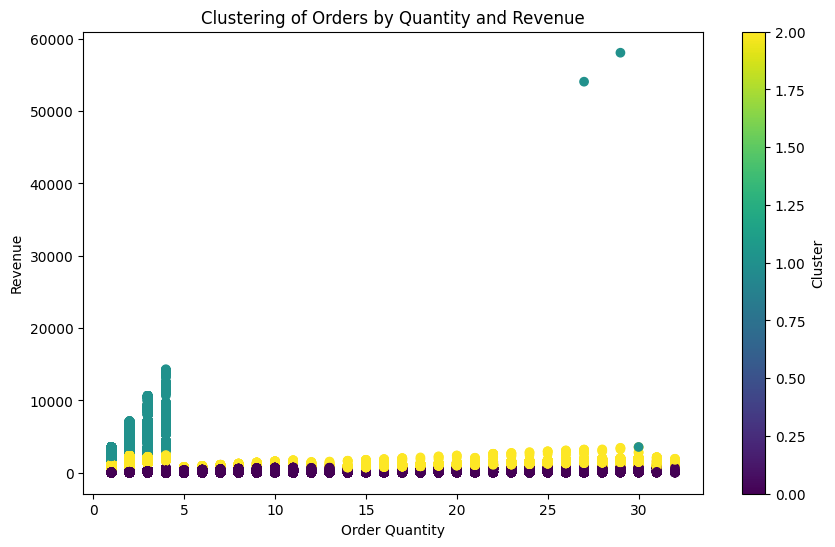

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
df = df.reset_index(drop=True)
dTable = df[['Customer_Age', 'Cluster']]
# Visualisasi hasil clustering dengan Order_Quantity dan Revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['Order_Quantity'], df['Revenue'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Orders by Quantity and Revenue')
plt.xlabel('Order Quantity')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

